In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from datetime import datetime
from scipy.stats import multivariate_normal

cdata = pd.read_csv('owid-covid-data.csv')

In [2]:
cdata.shape

(293500, 67)

In [3]:
cdata.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Берем данные по России с 3 марта

In [5]:
cdata_rus = cdata[(cdata['location'] == 'Russia')&(cdata['date'] >= '2020-03-03')]
cdata_rus.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
214839,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214840,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214841,RUS,Europe,Russia,2020-03-05,3.0,0.0,0.143,NaN,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214842,RUS,Europe,Russia,2020-03-06,4.0,1.0,0.286,NaN,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
214843,RUS,Europe,Russia,2020-03-07,4.0,0.0,0.286,NaN,0.0,0.0,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [49]:
cdata_rus.shape

(1102, 67)

In [50]:
cdata_rus.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

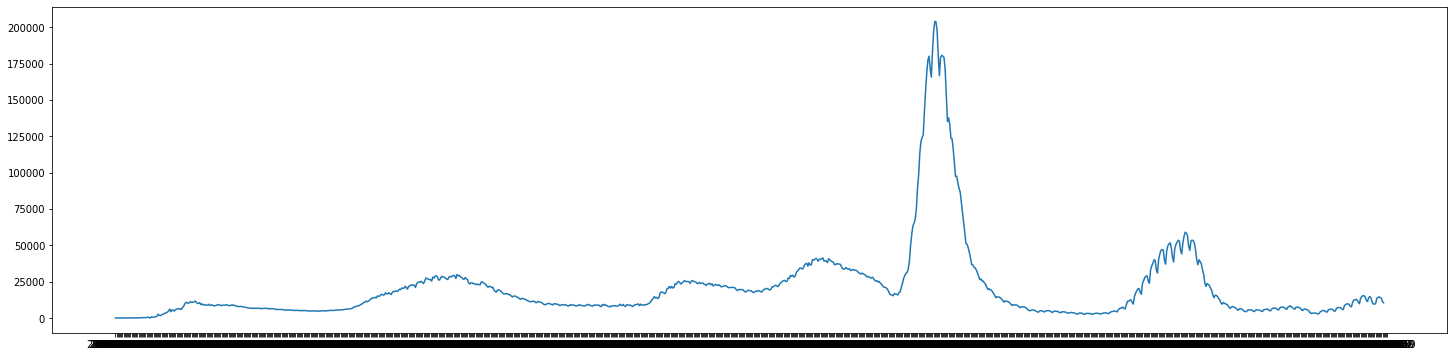

In [42]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'], cdata_rus['new_cases'])


График роста заболеваемости в России по дням с начала эпидемии

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

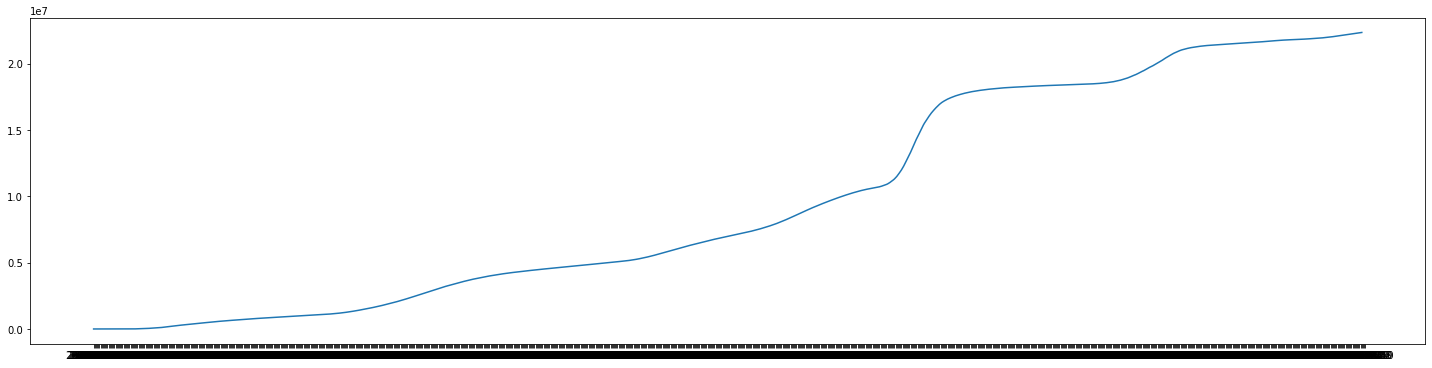

In [43]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'], cdata_rus['total_cases'])


Начало роста заболеваемости похоже на экспоненту

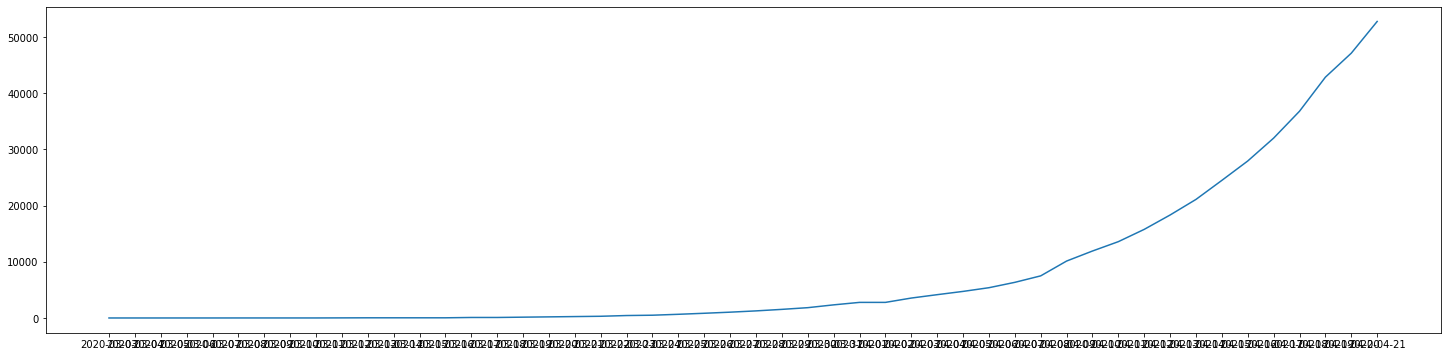

In [47]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'].head(50), cdata_rus['total_cases'].head(50))


# Задание 1


Смоделируем рост заболеваемости ковидом с помощью линейной регрессии. 
Допустим, что рост  экспоненциальный от порядкового дня x с начала распространения. 

$$
y =  \ e^{Ax} \, 
$$

$$
ln(y) = Ax
$$
Получили линейную модель. В нашем случае 
$$
y = ln(total__cases)
$$
, x - дней с начала распространения

In [6]:
# добавляем необходимые данные
cdata_rus['log_target'] = cdata_rus.total_cases.apply(lambda x: np.log(x))
cdata_rus['daily_order'] = cdata_rus.date.apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - datetime.strptime(cdata_rus['date'].iloc[0], "%Y-%m-%d")).days )


<ipython-input-6-47a0e766494c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['log_target'] = cdata_rus.total_cases.apply(lambda x: np.log(x))
<ipython-input-6-47a0e766494c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['daily_order'] = cdata_rus.date.apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - datetime.strptime(cdata_rus['date'].iloc[0], "%Y-%m-%d")).days )


In [52]:
cdata_rus.tail() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,log_target,daily_order
215936,RUS,Europe,Russia,2023-03-05,22342128.0,13559.0,12713.000,396298.0,43.0,37.571,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,16.921985,1097
215937,RUS,Europe,Russia,2023-03-06,22353291.0,11163.0,12939.143,396336.0,38.0,38.714,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,16.922484,1098
215938,RUS,Europe,Russia,2023-03-07,22363740.0,10449.0,13038.571,396378.0,42.0,39.714,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,16.922951,1099
215939,RUS,Europe,Russia,2023-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,NaN,1100
215940,RUS,Europe,Russia,2023-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,NaN,1101


In [11]:
train_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order']].iloc[:50]
test_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order']].iloc[50:]

In [12]:
# обучаем модель 
linreg = LinearRegression()

In [13]:
linreg.fit(train_cdata[['daily_order']], train_cdata.log_target)

LinearRegression()

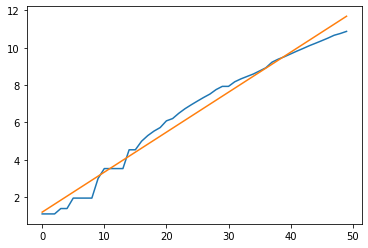

In [43]:

plt.plot(train_cdata.daily_order, train_cdata.log_target)
plt.plot(train_cdata.daily_order, linreg.predict(train_cdata[["daily_order"]])) 

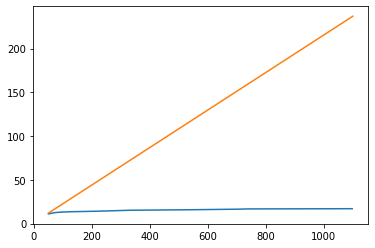

In [57]:
plt.plot(test_cdata.daily_order, test_cdata.log_target)
plt.plot(test_cdata.daily_order, linreg.predict(test_cdata[["daily_order"]]))

Найдем апостериорное распределение параметров этой модели для достаточно широкого априорного распределения

Оценим дисперсию шума e - 
$$
 y = Ax + e
$$

In [14]:
preds = linreg.predict(train_cdata[["daily_order"]])
std_noise = np.std(preds - train_cdata.log_target)
std_noise

0.4498899109116323

In [15]:
# возьмем произвольные параметры априорного распределения 
n = 2
mu = np.zeros(n)
sigma = 100 * np.eye(n)

Тогда апостериорное распределение рассчитаем по формуле
$$
𝑝(w ∣ D) = 𝑁(w ∣ {𝜇_𝑁}, {Σ_𝑁} )
$$
где 
$$
{𝜇_N} = {Σ_N} ({Σ_0^{-1}}{𝜇_0} + {\frac{1}{Σ^2}}{X^⊤y}) 
$$

$$
{Σ_𝑁}^{-1} = {Σ_0^{-1}} + {\frac{1}{Σ^2}}{X^⊤X}
$$

In [16]:
# оценим параметры апостериорного распределения 

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x_i] for x_i in x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [18]:
cur_mu, cur_sigma = bayesian_update(mu, sigma, train_cdata.daily_order.values, train_cdata.log_target.values, std_noise)
cur_mu.shape, cur_sigma.shape
cur_mu, cur_sigma

(array([1.19323277, 0.21411201]), array([[ 1.57133653e-02, -4.76162561e-04],
        [-4.76162561e-04,  1.94359933e-05]]))

In [229]:
N = 250

X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [230]:
# апостерионое распределение
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

(250, 250)


In [232]:
# Посэмплируем и порисуем прямые
def myplot_sample_lines(mu, sigma, n=20, points=None):
    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

In [235]:
xs = np.linspace(0, 181, 181)

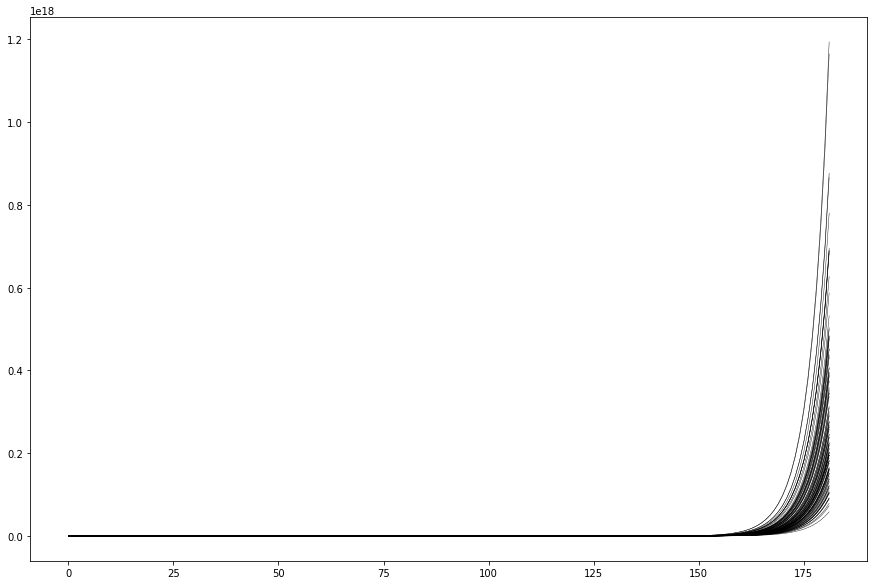

In [236]:
# points = [ cdata_rus[cdata_rus['date'] == '2020-05-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-05-01'].total_cases.values]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

myplot_sample_lines(cur_mu, cur_sigma, 100)

# plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)


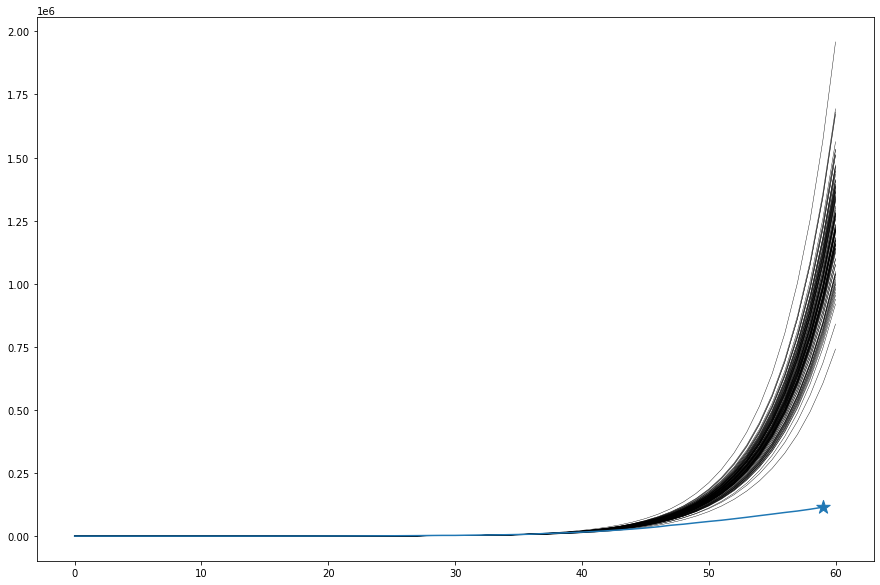

In [233]:
xs = np.linspace(0, 60, 61)
points = [ cdata_rus[cdata_rus['date'] == '2020-05-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-05-01'].total_cases.values
          ]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

myplot_sample_lines(cur_mu, cur_sigma, 100,
                    points)
plt.plot(cdata_rus.daily_order.values[:60], cdata_rus.total_cases.values[:60])


Синий график со звездой показывает реальное распределение заболеваний к 1 мая. Видно что кривые из апостериорного распределения предсказывает сильно большие значения 

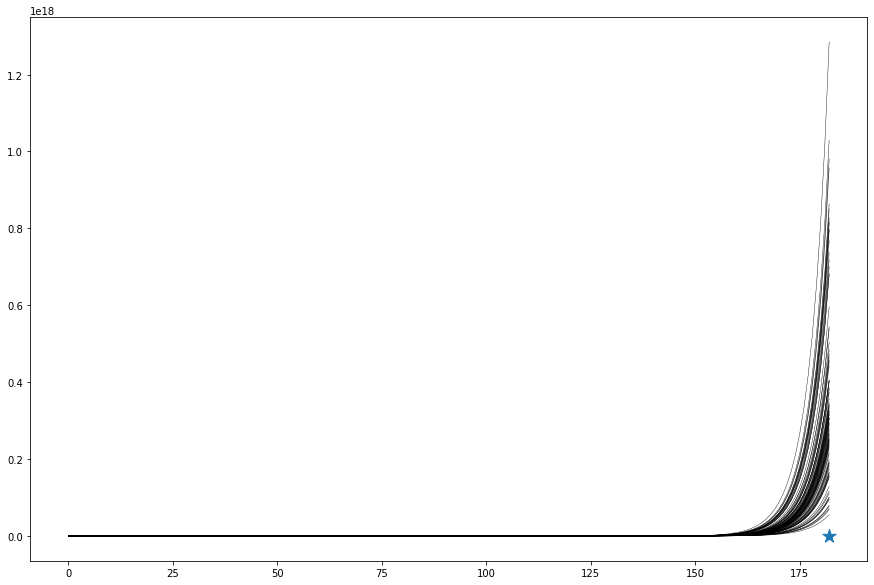

In [237]:
xs = np.linspace(0, 182, 182)
points = [ cdata_rus[cdata_rus['date'] == '2020-09-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-09-01'].total_cases.values
          ]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100,
                    points)

# plt.plot(cdata_rus.daily_order.values[:182], cdata_rus.total_cases.values[:182])


Аналогичное к 1 сентября, предсказаное значение кратно отличается от реального

# Задание 2

Если посмотреть внимательнее на график роста заболеваемости, то к определенному дню он выходит на насыщение. Тогда график имеет сигмоидальный вид. В качестве конкретной формы такой сигмоиды возьмём форму функции распределения для гауссиана: 
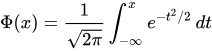

Сведем решение сигмоидальной функции к линейной регрессии. 
$$
y(x) =  \int_{-\infty}^{x} e^{at^2 + bt + c} \,dt = дискретный \ случай
= \sum_{0}^{x} e^{at^2 + bt + c} =
 \sum_{0}^{x-1} e^{at^2 + bt + c} + e^{ax^2 + xb + c}
$$

$$
y_N = y_{N-1} + e^{ax_N^2 + x_Nb + c}
$$

 в нашем случае 
 $$
 ln({totalcases}_N - {totalcases}_{N-1}) = ax_N^2 + x_Nb + c => ln(newcases) = AX
 $$
 $$ рассмотрим\ линеную\ регрессию\ уже\ с \ 2я \ признаками \ - x, x^2
 $$

In [102]:
# добавляем нужные данные
cdata_rus['daily_order_sqrt'] = cdata_rus.daily_order.apply(lambda x: np.square(x))
cdata_rus['new_cases'] = cdata_rus.new_cases.apply(lambda x: 1 if x == 0 else x)
cdata_rus['new_cases_log'] = cdata_rus.new_cases.apply(lambda x: (-1)*np.log(x))

<ipython-input-102-f5aa9d39176c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['daily_order_sqrt'] = cdata_rus.daily_order.apply(lambda x: np.square(x))
<ipython-input-102-f5aa9d39176c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['new_cases'] = cdata_rus.new_cases.apply(lambda x: 1 if x == 0 else x)
<ipython-input-102-f5aa9d39176c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [103]:
train_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order', 'daily_order_sqrt', 'new_cases_log']].iloc[:50]
test_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order', 'daily_order_sqrt', 'new_cases_log']].iloc[50:]

In [104]:
linreg = LinearRegression()

linreg.fit(train_cdata[['daily_order', 'daily_order_sqrt']].values, train_cdata.new_cases_log.values)

LinearRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


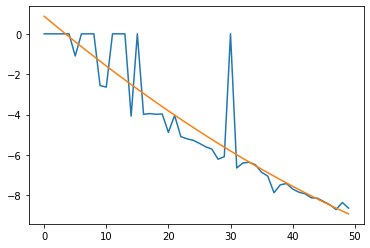

In [105]:
plt.plot(train_cdata.daily_order, train_cdata.new_cases_log)
plt.plot(train_cdata.daily_order, linreg.predict(train_cdata[['daily_order', 'daily_order_sqrt']])) 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


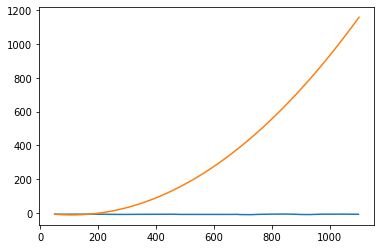

In [106]:
plt.plot(test_cdata.daily_order, test_cdata.new_cases_log)
plt.plot(test_cdata.daily_order, linreg.predict(test_cdata[['daily_order', 'daily_order_sqrt']])) 

In [107]:
linreg = LinearRegression()

linreg.fit(cdata_rus[['daily_order', 'daily_order_sqrt']].values, cdata_rus.new_cases_log.fillna(0).values)

LinearRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


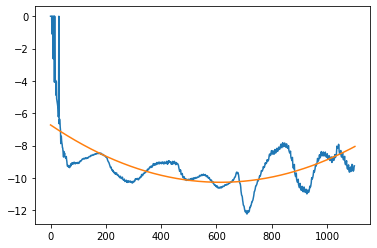

In [108]:
plt.plot(cdata_rus.daily_order, cdata_rus.new_cases_log)
plt.plot(cdata_rus.daily_order, linreg.predict(cdata_rus[['daily_order', 'daily_order_sqrt']]))

In [109]:
preds = linreg.predict(cdata_rus[['daily_order', 'daily_order_sqrt']].values)
var_noise = np.std(preds - cdata_rus.new_cases_log.fillna(0).values)
var_noise

1.2440674966077454

In [110]:
# теперь у нас размерность 3 признака 
n = 3
mu = np.zeros(n)
sigma = 100 * np.eye(n)

In [111]:
xs = np.linspace(0, 1000, 1001)

In [112]:
# x_data = pd.DataFrame()
# x_data['b'] = np.ones(50)
# x_data['daily_order'] = train_cdata['daily_order'].values
# x_d55ata['daily_order_sqrt']=train_cdata['daily_order_sqrt'].values

x_data = pd.DataFrame()
x_data['b'] = np.ones(cdata_rus.shape[0])
x_data['daily_order'] = cdata_rus['daily_order'].values
x_data['daily_order_sqrt']=cdata_rus['daily_order_sqrt'].values

In [113]:
def bayesian_update(mu, sigma, x_matrix, y, sigma_noise=.25):
    
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [114]:
cur_mu, cur_sigma = bayesian_update(mu, sigma, x_data.values, cdata_rus.new_cases_log.fillna(0).values, var_noise)
cur_mu.shape, cur_sigma.shape
cur_mu, cur_sigma

(array([-6.72110248e+00, -1.15409916e-02,  9.38344846e-06]),
 array([[ 1.25926947e-02, -4.57292433e-05,  3.45961895e-08],
        [-4.57292433e-05,  2.21649026e-07, -1.88714432e-10],
        [ 3.45961895e-08, -1.88714432e-10,  1.71405155e-13]]))

In [138]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        s0 = 0
        y_total = []
        for i in xs:
            y = np.exp(w[0] + w[1]*i+w[2]*np.square(i))
            y += s0
            y_total.append(y)
            s0 += y
        plt.plot(xs, np.array(y_total), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

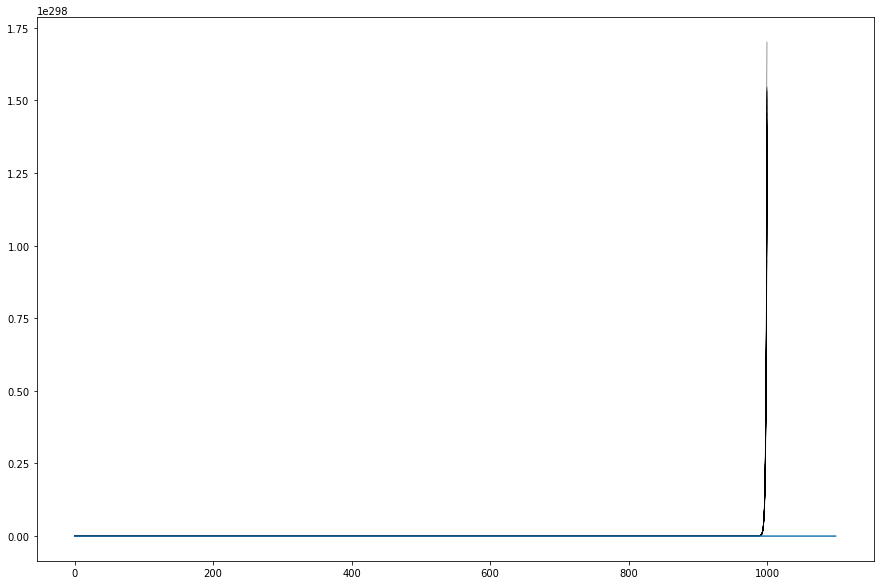

In [139]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

# ax.set_xlim((xs[0], 700))
# ax.set_ylim((0, 20**6))

myplot_sample_lines(cur_mu, cur_sigma, 100)
plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)

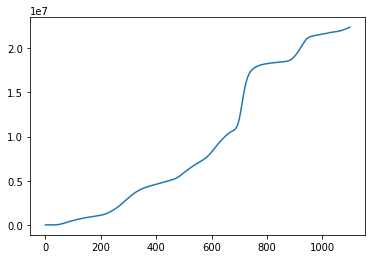

In [97]:
plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)

In [ ]:
55